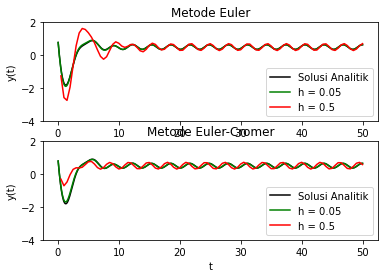

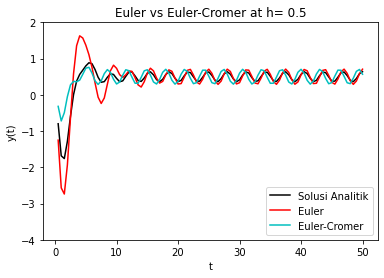

In [11]:
from solver import *
from math import *
import matplotlib.pyplot as plt
from metode_euler import *


# example y" = -y - y' + sin^2(t)
def Func(t,y,dy):
    return (-1 *y) + (-1 * dy) + sin(t)**2

def eksak(t):
    return ((5/13)*exp(-0.5*t) * cos( 0.5 * sqrt(3) * t ) ) - ( 108/(13 * sqrt(3)) * exp(-0.5*t) * sin(0.5 * sqrt(3) * t )  ) + 0.5 + ((3/26) * cos(2*t)) - ((1/13)*sin(2*t))

def solusi_analitik(params):
    t0 = params['t0']
    t_akhir = params['t_akhir']
    h = params['h']
    step = int((t_akhir - t0) / h)
    t = []
    res_eksak = []
    for i in range(step):
        tm = (i + 1) * h
        y_next = eksak(tm)
        res_eksak.append(y_next)
        t.append(tm)
    return (t,res_eksak)

params = {
    't0' : 0,
    "t_akhir" : 50,
    "h" : 5 * 10**-2,
    "y0" : 1,
    "dy0" : -9/2
}

params2 = {
    't0' : 0,
    "t_akhir" : 50,
    "h" : 5 * 10**-1,
    "y0" : 1,
    "dy0" : -9/2
}

res_eksak = []
res_euler = []
res_euler_2 = []
res_eulercromer = []
res_eulercromer_2 = []
t = []

plt.subplot(2,1,1)


# Plot Euler
(t,res_eksak) = solusi_analitik(params)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_euler) = cauchy_euler(params,Func)
plt.plot(t,res_euler,color='g', label = 'h = 0.05')

(t,res_euler_2) = cauchy_euler(params2,Func)
plt.plot(t,res_euler_2,color='r',label = 'h = 0.5')
plt.title('Metode Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()

plt.subplot(2,1,2)
# plot euler cromer
(t,res_eksak) = solusi_analitik(params)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_eulercromer) = cauchy_eulercromer(params,Func)
plt.plot(t,res_eulercromer,color='g', label = 'h = 0.05')

(t,res_eulercromer_2) = cauchy_eulercromer(params2,Func)
plt.plot(t,res_eulercromer_2,color='r',label = 'h = 0.5')
plt.title('Metode Euler-Cromer')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()

plt.figure()
# plot comparison
(t,res_eksak) = solusi_analitik(params2)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_euler_2) = cauchy_euler(params2,Func)
plt.plot(t,res_euler_2,color='r',label = 'Euler ')

(t,res_eulercromer_2) = cauchy_eulercromer(params2,Func)
plt.plot(t,res_eulercromer_2,color='c',label = 'Euler-Cromer')
plt.title('Euler vs Euler-Cromer at h= 0.5')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()



plt.show()